In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D,MaxPooling2D,LSTM,BatchNormalization,Flatten

from keras.preprocessing.image import img_to_array
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tf14\lib\site-packages\tensorflow\python\frame

In [2]:
df_train=pd.read_csv("./DATA/train.csv",encoding="utf8")
df_test=pd.read_csv("./DATA/test.csv",encoding="utf8")

In [3]:
df_train

,image_id,label
0,00002.jpg,C
1,00003.jpg,C
2,00004.jpg,B
3,00005.jpg,A
4,00007.jpg,A
...,...,...
6125,07681.jpg,B
6126,07682.jpg,C
6127,07683.jpg,A
6128,07684.jpg,C


test=df_train[df_train['image_id']=='00002.jpg']['label'].values
train_Y.append(test)

train_Y[0]

test[0]

print(train_Y)

test.reset_index(drop=True, inplace=True)

test = pd.get_dummies(test)

test

train_path='./DATA/Train_Image'
test_path='./DATA/Test_Image'

AllPath=os.listdir(train_path)

In [4]:
train_X=[]
train_Y=[]

In [5]:
for root,dirs,files in os.walk('./DATA/Train_Image/'):
    for name in files:
        img=cv2.imread(os.path.join(root,name))
        res = cv2.resize(img,(240,240),interpolation=cv2.INTER_LINEAR)
        res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
        res=img_to_array(res)
        del img
        
        train_X.append(res)
        temp=df_train[df_train['image_id']==name]['label'].values
        train_Y.append(temp[0])
        del res
        gc.collect()
#         img=cv2.imread(os.path.join(root,name))
        

x_train=train_X
y_train=train_Y

In [6]:
train_Y=pd.get_dummies(train_Y)

In [7]:
# for i in range(0,len(x_train)):
#     x_train[i]=(x_train[i]/255)
    
train_Y = np.array(train_Y)

In [8]:
train_X=np.array(train_X)

In [9]:
train_X

array([[[[223., 196.,  43.],
         [222., 196.,  37.],
         [220., 195.,  32.],
         ...,
         [  1.,   1.,   0.],
         [  3.,   3.,   1.],
         [  2.,   2.,   0.]],

        [[222., 196.,  39.],
         [220., 194.,  37.],
         [219., 193.,  33.],
         ...,
         [  4.,   4.,   2.],
         [  3.,   3.,   1.],
         [  1.,   1.,   0.]],

        [[221., 196.,  34.],
         [219., 193.,  36.],
         [217., 191.,  36.],
         ...,
         [  4.,   4.,   2.],
         [  4.,   4.,   2.],
         [  2.,   2.,   0.]],

        ...,

        [[219., 180.,   0.],
         [224., 186.,   1.],
         [228., 190.,   3.],
         ...,
         [101.,  76.,  80.],
         [103.,  78.,  82.],
         [100.,  75.,  79.]],

        [[220., 181.,   2.],
         [221., 182.,   0.],
         [224., 186.,   1.],
         ...,
         [ 99.,  74.,  78.],
         [100.,  75.,  79.],
         [104.,  79.,  83.]],

        [[218., 178.,   2.],
       

In [10]:
train_Y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [11]:
test_X=[]
test_Y=[]

In [12]:
for root,dirs,files in os.walk('./DATA/Test_Image/'):
    for name in files:
        img=cv2.imread(os.path.join(root,name))
        res = cv2.resize(img,(240,240),interpolation=cv2.INTER_LINEAR)
        res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
        res=img_to_array(res)
        del img
        
        test_X.append(res)
        temp=df_test[df_test['image_id']==name]['label'].values
        test_Y.append(temp[0])
        del res
        gc.collect()
#         img=cv2.imread(os.path.join(root,name))
        

In [13]:
test_Y=pd.get_dummies(test_Y)

In [14]:
test_X=np.array(test_X)

img=cv2.imread('./DATA/Train_Image/00292.jpg')

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

for root,dirs,files in os.walk('./train/cat'):
    for name in files:
        img=cv2.imread(os.path.join(root,name))
        #res=cv2.resize(img,(800,800),interpolation=cv2.INTER_LINEAR)
        res=img_to_array(img)
        del img
        train_X.append(res)
        train_Y.append('cat')
        del res
        gc.collect()

train_Y

x_train,x_test,y_train,y_test = train_test_split(train_X,train_Y,test_size=0.2)

for i in range(0,len(x_train)):
    x_train[i]=(x_train[i]/255)

for i in range(0,len(x_test)):
     x_test[i]=(x_test[i]/255)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

#x_train.shape = np.array(list).shape
#print(x_train.shape)
(np.array(x_train)).shape

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


x_train = test
x_test = x_test.astype('float32')/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

cifar10.load_data()

In [51]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(240, 240, 3), activation='elu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, activation='elu', padding='same'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dropout(rate=0.1))
model.add(Dense(3, activation='softmax'))

model.summary();

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 240, 240, 32)      896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 240, 240, 32)      9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 240, 240, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 120, 120, 64)      18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 60, 60, 64)       

In [52]:
precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[precision,recall,'accuracy'])
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
6130/6130 [==============================] - 26s 4ms/sample - loss: 1.4769 - precision: 0.4555 - recall: 0.3183 - acc: 0.4338
Epoch 2/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 1.0624 - precision: 0.4963 - recall: 0.2755 - acc: 0.4426
Epoch 3/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 1.0065 - precision: 0.5277 - recall: 0.3352 - acc: 0.4824
Epoch 4/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 0.9282 - precision: 0.5920 - recall: 0.4163 - acc: 0.5395s - loss:
Epoch 5/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 0.9019 - precision: 0.6088 - recall: 0.4346 - acc: 0.5626
Epoch 6/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 0.7677 - precision: 0.6824 - recall: 0.5928 - acc: 0.6525
Epoch 7/30
6130/6130 [==============================] - 25s 4ms/sample - loss: 0.6745 - precision: 0.7217 - recall: 0.6489 - acc: 0.6953
Epoch 8/30
6130/6130 [==========

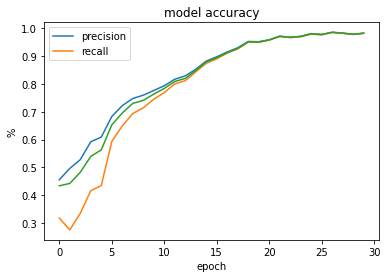

In [54]:
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [55]:
preds = model.evaluate(x = test_X, y = test_Y)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1',F1)

250/250 [==============================] - 1s 3ms/sample - loss: 1.4356 - precision: 0.7309 - recall: 0.7280 - acc: 0.7320
Precision 0.7309237
Recall 0.728
F1 0.7294589568077825
